In [1]:
# import required liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV , cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score

In [2]:
data=pd.read_csv("C:\\Users\\skalk\\Downloads\\medical_cost_insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.shape

(1338, 7)

In [4]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
from sklearn.preprocessing import OrdinalEncoder

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
#convert columns from string to numerical values
data['sex']=data['sex'].map({'female':0,'male':1})
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [8]:
data['smoker']=data['smoker'].map({'yes':1,'no':0})
data['region']=data['region'].map({'southwest':1,'southeast':2,'northwest':3,'northeast':4})
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [11]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [12]:
x=data.drop(['charges'],axis=1)

In [13]:
y=data['charges']

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [17]:
y_train

1243     3171.61490
264     20462.99766
476     35147.52848
502     22218.11490
501      6837.36870
           ...     
341     13352.09980
653      8527.53200
713      1984.45330
976      7804.16050
568     11552.90400
Name: charges, Length: 1070, dtype: float64

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [19]:
lr=LinearRegression()
lr.fit(x_train,y_train)
svm=SVR()
svm.fit(x_train,y_train)
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
gr=GradientBoostingRegressor()
gr.fit(x_train,y_train)

GradientBoostingRegressor()

In [23]:
y_pred1=lr.predict(x_test)
y_pred2=svm.predict(x_test)
y_pred3=rf.predict(x_test)
y_pred4=gr.predict(x_test)
df1=pd.DataFrame({'Actual':y_test,'Lr':y_pred1,'svm':y_pred2,'rf':y_pred3,'gr':y_pred4})

In [24]:
df1

,Actual,Lr,svm,rf,gr
1036,37484.44930,30143.277685,9067.621239,37196.913604,37276.009704
1294,11931.12525,11300.139295,9281.612501,12140.727747,12002.770674
834,5377.45780,8421.129059,9140.133145,6097.230556,6565.044879
1321,28101.33305,37075.161034,9300.448395,28641.414930,27021.047118
153,19964.74630,31166.669002,9178.395499,25768.464074,23354.662848
...,...,...,...,...,...
308,11944.59435,14392.618745,9286.685202,12081.773006,13278.521757
124,10115.00885,12656.605232,9219.214358,9627.277867,9899.666264
1305,2464.61880,2689.768711,9069.224821,3312.193811,3632.639604
831,5266.36560,5668.651326,9136.704887,5168.165765,5792.054546


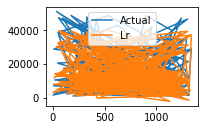

In [25]:
#compare performance visually
plt.subplot(221)
plt.plot(df1['Actual'],label='Actual')
plt.plot(df1['Lr'],label="Lr")
plt.legend()

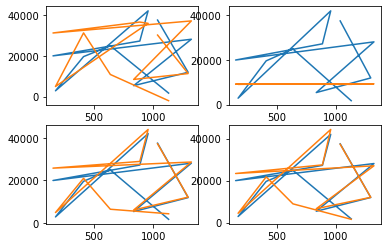

In [26]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['Lr'].iloc[0:11],label="Lr")

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['svm'].iloc[0:11],label="svr")

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rf'].iloc[0:11],label="rf")

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['gr'].iloc[0:11],label="gr")

In [27]:
from sklearn import metrics


In [28]:
score1=metrics.r2_score(y_test,y_pred1)
score2=metrics.r2_score(y_test,y_pred2)
score3=metrics.r2_score(y_test,y_pred3)
score4=metrics.r2_score(y_test,y_pred4)

In [29]:
print(score1,score2,score3,score4)

0.7023295481582463 -0.1581076695339001 0.7887365162837465 0.8163798262751254


In [30]:
s1=metrics.mean_absolute_error(y_test,y_pred1)
s2=metrics.mean_absolute_error(y_test,y_pred2)
s3=metrics.mean_absolute_error(y_test,y_pred3)
s4=metrics.mean_absolute_error(y_test,y_pred4)

In [31]:
print(s1,s2,s3,s4)

4478.393271197854 8643.354021597806 3012.899659370846 2733.6057693184757


In [32]:
#predict charges for new customer
data={'age':40,
     'sex':1,
     'bmi':40.30,
     'children':4,
     'smoker':1,
     'region':2}
df=pd.DataFrame(data,index=[0])
df

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2
